In [26]:
import numpy as np
import glob
import xarray as xr
import pandas as pd
# rad_path = '/g/data/oe9/project/team-drip/AWAP/AWAP_month_radiation.nc'
# radnc = xr.open_dataset(rad_path)
# # radnc = radnc.rename({'e0_avg':'pet'})
# radnc = radnc.where(radnc>=0, np.nan)
# radnc = radnc.squeeze()
# radnc
spi = xr.open_dataarray('/g/data/oe9/project/team-drip/Rainfall/SPI_awap/SPI_12M_masked.nc')
spi
                       
# EVI_5km = xr.open_dataset('/g/data/oe9/project/team-drip/resampled_NDVI/coarse_EVI.nc')

# EVI_5km.evi
rainfall = xr.open_dataarray('/g/data/oe9/project/team-drip/AWAP/AWAP_month_rain.nc')

<xarray.DataArray 'SPI_12M' (latitude: 263, longitude: 280, time: 216)>
[15906240 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude  (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 138.8 ...
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 2000-03-01 ...

In [3]:
EVI_5km_yearly=EVI_5km.evi.resample(time="1A").mean(dim='time')
EVI_5km_yearly


<xarray.DataArray 'evi' (time: 17)>
array([ 0.246354,  0.218714,  0.183381,  0.218716,  0.208918,  0.212273,
        0.189509,  0.206377,  0.204726,  0.196396,  0.248341,  0.22797 ,
        0.214916,  0.203545,  0.213236,  0.214275,  0.237423])
Coordinates:
  * time     (time) datetime64[ns] 2000-12-31 2001-12-31 2002-12-31 ...

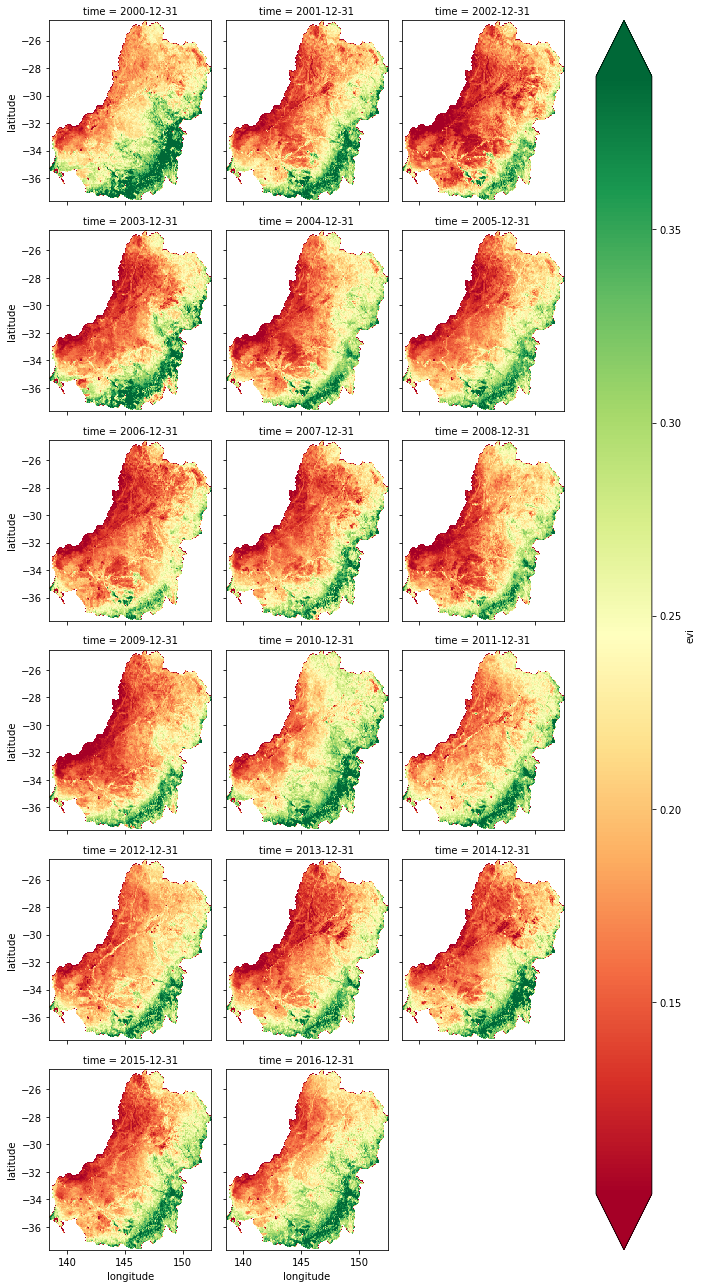

In [5]:
%matplotlib inline
EVI_5km_yearly.isel(time = range(0,17)).plot.imshow(col='time', robust = True, col_wrap=3, cmap = 'RdYlGn')

In [6]:
evi_ts = EVI_5km_yearly.mean(dim={'latitude', 'longitude'}, skipna=True, keep_attrs=False)
evi_ts

<xarray.DataArray 'evi' (time: 17)>
array([ 0.246354,  0.218714,  0.183381,  0.218716,  0.208918,  0.212273,
        0.189509,  0.206377,  0.204726,  0.196396,  0.248341,  0.22797 ,
        0.214916,  0.203545,  0.213236,  0.214275,  0.237423])
Coordinates:
  * time     (time) datetime64[ns] 2000-12-31 2001-12-31 2002-12-31 ...

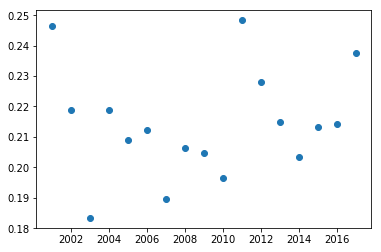

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.plot_date(evi_ts.time,evi_ts)
plt.show()